In [1]:
#importing required liberary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import datasets
data=pd.read_csv("data.csv",names=['x1','x2','y']);

In [3]:
#reading 5 dataset
data.head()

,x1,x2,y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [4]:
data.loc[:, 'y'].replace([0,1], [0.0,1.0], inplace=True)

In [5]:
data.head()

,x1,x2,y
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0


In [6]:
#no of 0 in y
np.sum(data['y']==0)

50

In [7]:
#no of 1 in y
np.sum(data['y']==1)

50

In [8]:
#viewing size of dataset
data['x1'].size

100

In [9]:
#normalizing
data['x1']=((data['x1']-data['x1'].min())/(data['x1'].max()-data['x1'].min()))
data['x2']=((data['x2']-data['x2'].min())/(data['x2'].max()-data['x2'].min()))

In [10]:
data.head()

,x1,x2,y
0,0.296296,0.625000,0.0
1,0.222222,0.416667,0.0
2,0.148148,0.500000,0.0
3,0.111111,0.458333,0.0
4,0.259259,0.666667,0.0


In [11]:
i=35
j=35
k=0
tr=0
te=0
x1=np.zeros(70)
x2=np.zeros(70)
y=np.zeros(70)
x1_test=np.zeros(30)
x2_test=np.zeros(30)
y_test=np.zeros(30)
for k in range(100):
    if data.loc[k,'y']==0.0 and i>0:
        x1[tr]=data.loc[k,'x1']
        x2[tr]=data.loc[k,'x2']
        y[tr]=data.loc[k,'y']
        i=i-1
        tr=tr+1
    elif data.loc[k,'y']==1.0 and j>0:
        x1[tr]=data.loc[k,'x1']
        x2[tr]=data.loc[k,'x2']
        y[tr]=data.loc[k,'y']
        j=j-1
        tr=tr+1
    else:
        x1_test[te]=data.loc[k,'x1']
        x2_test[te]=data.loc[k,'x2']
        y_test[te]=data.loc[k,'y']
        te=te+1

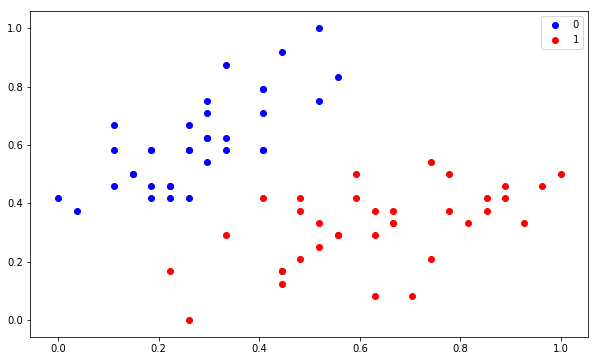

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(x1[y == 0], x2[y == 0.0], color='b', label='0')
plt.scatter(x1[y == 1], x2[y == 1.0], color='r', label='1')
plt.legend();
plt.show()

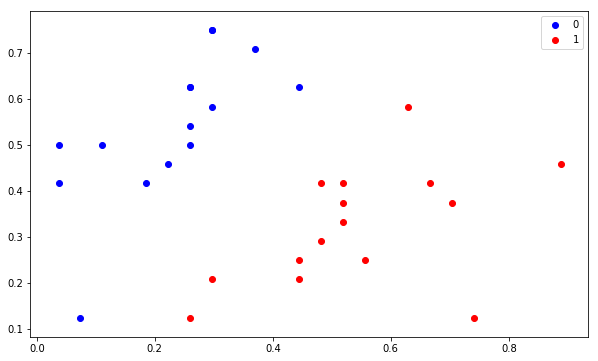

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(x1_test[y_test == 0], x2_test[y_test == 0.0], color='b', label='0')
plt.scatter(x1_test[y_test == 1], x2_test[y_test == 1.0], color='r', label='1')
plt.legend();
plt.show()

In [14]:
#Taking 70% of data as training set
#k=(int)(0.7*data['x1'].size)
#x1=np.array(data.loc[:k-1,'x1'])
#x2=np.array(data.loc[:k-1,'x2'])
#y=np.array(data.loc[:k-1,'y'])

In [15]:
#checking Size of training set
len(x1)

70

In [16]:
#Taking rest 30% as test data
#x1_test=np.array(data.loc[k:,'x1'])
#x2_test=np.array(data.loc[k:,'x2'])
#y_test=np.array(data.loc[k:,'y'])

In [17]:
#linear regression model
x1x1=x1*x1
x1x1_mean=x1x1.mean()

In [18]:
x1x2=x1*x2
x1x2_mean=x1x2.mean()

In [19]:
x1_mean=x1.mean()

In [20]:
x1y=x1*y
x1y_mean=x1y.mean()

In [21]:
x2x2=x2*x2
x2x2_mean=x2x2.mean()

In [22]:
x2_mean=x2.mean()

In [23]:
x2y=x2*y
x2y_mean=x2y.mean()

In [24]:
y_mean=y.mean()

In [25]:
#creating augmented matrix
M=np.array([[x1x1_mean, x1x2_mean, x1_mean,  x1y_mean],
            [x1x2_mean, x2x2_mean, x2_mean,  x2y_mean],
            [x1_mean,   x2_mean,   1.0,      y_mean]])
print(M)

[[0.26609837 0.20068342 0.45449735 0.31640212]
 [0.20068342 0.25895337 0.46607143 0.16011905]
 [0.45449735 0.46607143 1.         0.5       ]]


In [26]:
#performing row operation R2->R2-(M20/M00)R0
M[2,:]=M[2,:]-(M[2,0]/M[0,0])*M[0,:]
print(M)

[[ 0.26609837  0.20068342  0.45449735  0.31640212]
 [ 0.20068342  0.25895337  0.46607143  0.16011905]
 [ 0.          0.12330314  0.22371624 -0.0404164 ]]


In [27]:
#performing row operation R1->R1-(M10/M00)R0
M[1,:]=M[1,:]-(M[1,0]/M[0,0])*M[0,:]
print(M)

[[ 0.26609837  0.20068342  0.45449735  0.31640212]
 [ 0.          0.10760395  0.12330314 -0.07850195]
 [ 0.          0.12330314  0.22371624 -0.0404164 ]]


In [28]:
#performing row operation R2->R2-(M21/M11)R1
M[2,:]=M[2,:]-(M[2,1]/M[1,1])*M[1,:]
print(M)

[[ 0.26609837  0.20068342  0.45449735  0.31640212]
 [ 0.          0.10760395  0.12330314 -0.07850195]
 [ 0.          0.          0.08242343  0.04953882]]


In [29]:
#Calculating constant k=M23/M22
k=M[2,3]/M[2,2]
print(k)

0.6010283632161083


In [30]:
#calculating cofficient w2=(M13-k*M12)/M11
w2=(M[1,3]-k*M[1,2])/M[1,1]
print(w2)

-1.4182623964865222


In [31]:
#calculating cofficient w1=(M03-(w2*M01+k*M02))/M00
w1=(M[0,3]-(w2*M[0,1]+k*M[0,2])/M[0,0])
print(w1)

0.35945367333176614


In [32]:
m=0.0
m=len(x1)#size of train data
alpha=0.1#learning rate

In [33]:
for j in range(300000):
    Ew1=0.0
    Ew2=0.0
    Ek=0.0
    for i in range(m):
        s=w1*x1[i]+w2*x2[i]+k
        Ew1=Ew1+(x1[i]*(1/(1+np.exp(-1*s))-y[i]))
        Ew2=Ew2+(x2[i]*(1/(1+np.exp(-1*s))-y[i]))
        Ek=Ek+(1/(1+np.exp(-1*s))-y[i])
    Ew1=Ew1/m
    Ew2=Ew2/m
    Ek=Ek/m
    w1=w1-alpha*Ew1
    w2=w2-alpha*Ew2
    k=k-alpha*Ek

In [34]:
c=0
for i in range(len(x1_test)):
    s=w1*x1_test[i]+w2*x2_test[i]+k
    p=1/(1+np.exp(-1*s))
    if p.round()==y_test[i]:
        c+=1
print(c/len(x1_test))

0.9666666666666667


In [35]:
c=0
for i in range(len(x1)):
    s=w1*x1[i]+w2*x2[i]+k
    p=1/(1+np.exp(-1*s))
    if p.round()==y[i]:
        c+=1
print(c/len(x1))

1.0
